In [20]:
def evaluate_classifier_with_noise(df_positive, df_negative, pos_label=1, neg_label=0, title_suffix=""):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import cross_val_predict
    from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

    #Labels
    df_positive['Label'] = pos_label
    df_negative['Label'] = neg_label

    # Kombinieren
    data = pd.concat([df_positive, df_negative], ignore_index=True)

    # Visualisierung
    sns.histplot(data=data, x='SVM RNA-class probability', hue='Label', kde=True, bins=50)
    plt.title(f"Distribution of SVM RNA-class probability {title_suffix}")
    plt.xlabel("SVM RNA-class probability")
    plt.ylabel("Numbers")
    plt.show()

    # Vorbereitung
    X = data[['SVM RNA-class probability']]
    y = data['Label']
    model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Cross-Validation
    y_pred = cross_val_predict(model, X, y, cv=5, method='predict')
    y_proba = cross_val_predict(model, X, y, cv=5, method='predict_proba')[:, 1]

    # Auswertung
    print(" Confusion Matrix:\n", confusion_matrix(y, y_pred))
    print("\n Classification Report:\n", classification_report(y, y_pred))

    # ROC
    fpr, tpr, thresholds = roc_curve(y, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.2f})", color='red')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC-Curve {title_suffix}")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

In [18]:
import pandas as pd

df_sissi = pd.read_excel("C:/bla/Waste/MA/2.Versuch/Data/RNAz_Excel/sissi.xlsx", usecols=['SVM RNA-class probability'])
df_sissiz_mono = pd.read_excel("C:/bla/Waste/MA/2.Versuch/Data/RNAz_Excel/sissiz_mono.xlsx", usecols=['SVM RNA-class probability'])
df_sissiz_di = pd.read_excel("C:/bla/Waste/MA/2.Versuch/Data/RNAz_Excel/sissiz_di.xlsx", usecols=['SVM RNA-class probability'])
df_multiperm_mono = pd.read_excel("C:/bla/Waste/MA/2.Versuch/Data/RNAz_Excel/multiperm_mono.xlsx", usecols=['SVM RNA-class probability'])
df_multiperm_di = pd.read_excel("C:/bla/Waste/MA/2.Versuch/Data/RNAz_Excel/multiperm_di.xlsx", usecols=['SVM RNA-class probability'])
df_aln_shuffle = pd.read_excel("C:/bla/Waste/MA/2.Versuch/Data/RNAz_Excel/alifoldz.xlsx", usecols=['SVM RNA-class probability'])


## SISSIz_MONO

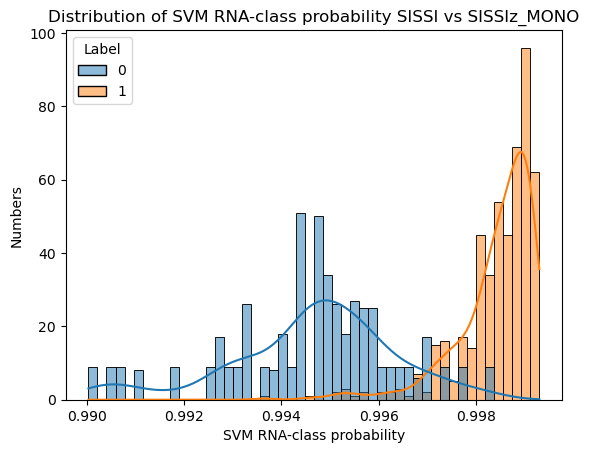

 Confusion Matrix:
 [[368 132]
 [ 15 485]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.74      0.83       500
           1       0.79      0.97      0.87       500

    accuracy                           0.85      1000
   macro avg       0.87      0.85      0.85      1000
weighted avg       0.87      0.85      0.85      1000



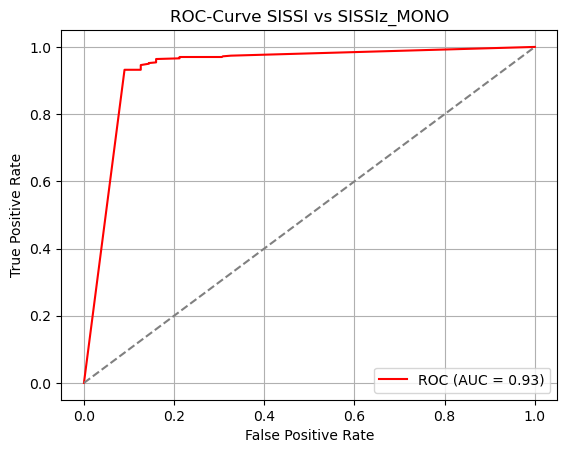

In [21]:
evaluate_classifier_with_noise(df_sissi, df_sissiz_mono, title_suffix="SISSI vs SISSIz_MONO")

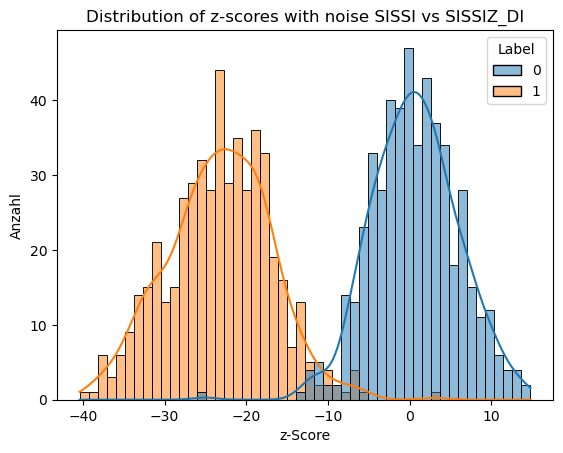

 Confusion Matrix:
 [[482  18]
 [ 16 484]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       500
           1       0.96      0.97      0.97       500

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



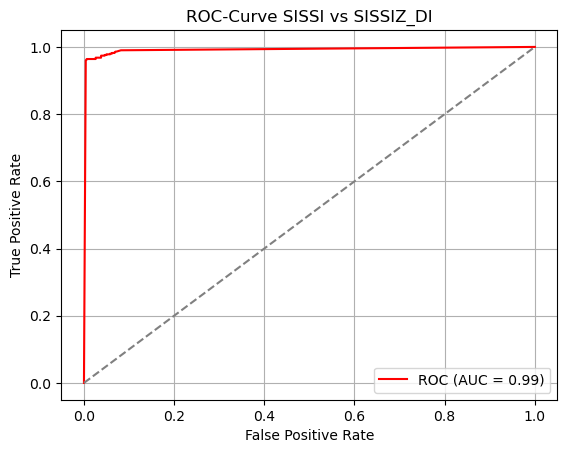

In [ ]:
# Beispiel mit sissi vs multiperm_di
evaluate_classifier_with_noise(df_sissi, df_sissiz_di, title_suffix="SISSI vs SISSIZ_DI")

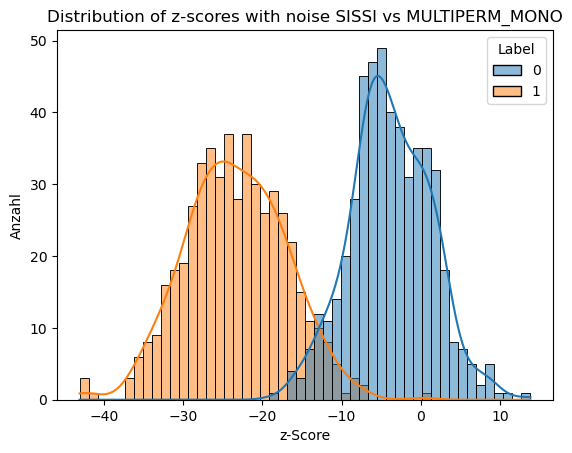

 Confusion Matrix:
 [[467  33]
 [ 32 468]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       500
           1       0.93      0.94      0.94       500

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.93      1000
weighted avg       0.94      0.94      0.93      1000



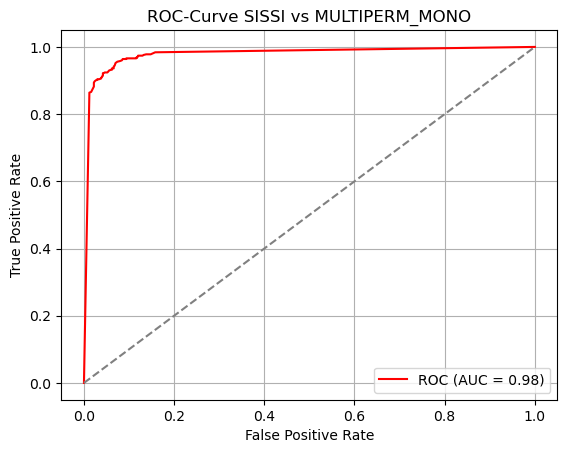

In [ ]:
evaluate_classifier_with_noise(df_sissi, df_multiperm_mono, title_suffix="SISSI vs MULTIPERM_MONO")

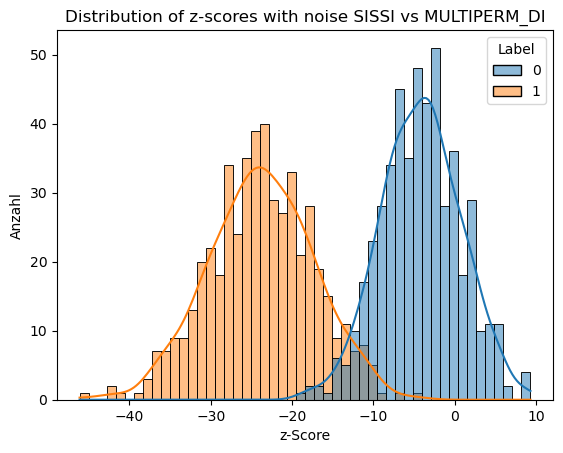

 Confusion Matrix:
 [[475  25]
 [ 31 469]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       500
           1       0.95      0.94      0.94       500

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



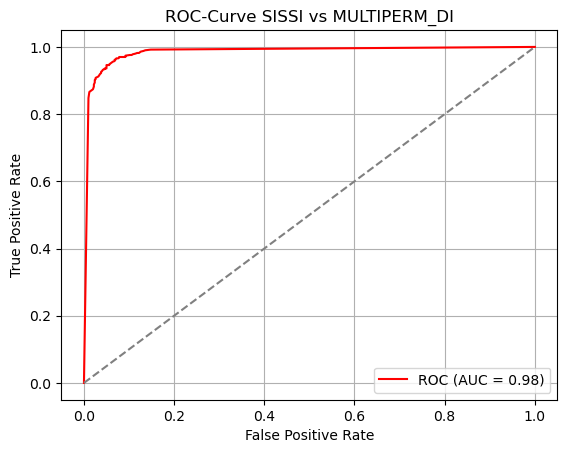

In [ ]:
evaluate_classifier_with_noise(df_sissi, df_multiperm_di, title_suffix="SISSI vs MULTIPERM_DI")

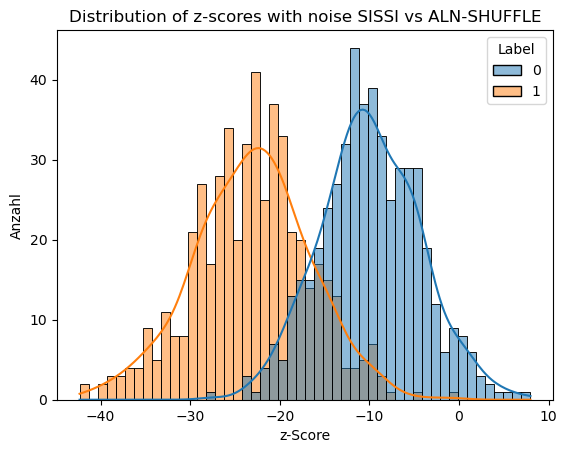

 Confusion Matrix:
 [[399 101]
 [ 97 403]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       500
           1       0.80      0.81      0.80       500

    accuracy                           0.80      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.80      0.80      0.80      1000



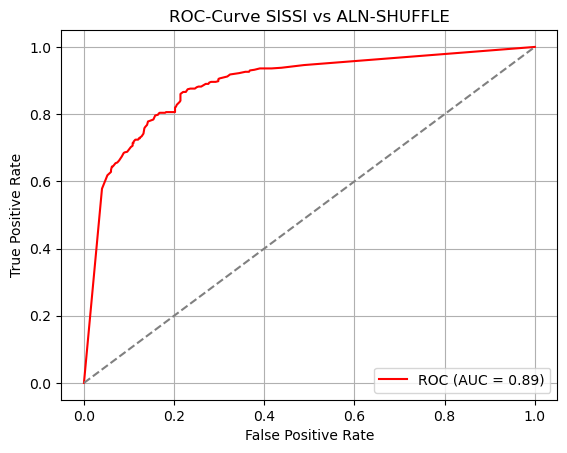

In [ ]:
evaluate_classifier_with_noise(df_sissi, df_aln_shuffle, title_suffix="SISSI vs ALN-SHUFFLE")